<a href="https://colab.research.google.com/github/aloiswirth/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
train_labels[0]

5

**"Fitting" the model**

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2553 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1025 - accuracy: 0.9701
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0675 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0486 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0369 - accuracy: 0.9887


**Using the model to make predictions**

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[9]

1/1 [==============================] - 0s 71ms/step


array([1.5040037e-11, 1.4710408e-13, 3.2941944e-11, 2.7363200e-07,
       2.4835923e-04, 5.0248268e-08, 1.5121374e-12, 2.6765045e-05,
       2.4052810e-05, 9.9970055e-01], dtype=float32)

In [15]:
predictions[9].argmax()

9

In [16]:
predictions[9][9]

0.99970055

In [17]:
test_labels[9]

9

**Evaluating the model on new data**

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9784
test_acc: 0.9783999919891357


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [19]:
import numpy as np
x = np.array(12)
x

array(12)

In [20]:
print(x)

12


In [21]:
x.ndim

0

In [22]:
x.shape

()

### Vectors (rank-1 tensors)

In [23]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [24]:
x.ndim

1

In [25]:
x.shape

(5,)

### Matrices (rank-2 tensors)

In [26]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [27]:
x.shape

(3, 5)

### Rank-3 and higher-rank tensors

In [28]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [29]:
x.shape

(3, 3, 5)

### Key attributes

In [30]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
train_images.ndim

3

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

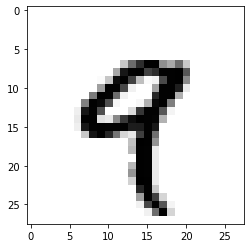

In [34]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [35]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [36]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [39]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [40]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

### The notion of data batches

In [41]:
batch = train_images[:128]

In [42]:
batch = train_images[128:256]

In [43]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [44]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [45]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [46]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(10000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.09 s


In [47]:
print(x.shape, '\n', x)
print(y.shape, '\n',y)

(20, 100) 
 [[0.41702127 0.6721977  0.19644898 ... 0.74482444 0.19773015 0.46784733]
 [0.65480822 0.10354819 0.52121516 ... 0.7867112  0.76614448 0.68047654]
 [0.05731968 0.42394374 0.41536437 ... 0.17217379 0.98481613 0.24110982]
 ...
 [0.94574999 0.04560695 0.36860219 ... 0.28617679 0.11640606 0.21100943]
 [0.44714697 0.24689815 0.5966933  ... 0.1441051  0.98322736 0.09623485]
 [0.27843563 0.96298873 0.29911181 ... 0.72364977 0.93144168 0.74041906]]
(20, 100) 
 [[0.08622336 0.0126006  0.42093436 ... 0.93901132 0.61324434 0.99599468]
 [0.5408949  0.16249602 0.18208083 ... 0.34789447 0.43954359 0.26760898]
 [0.38215303 0.27053947 0.08166655 ... 0.25557244 0.81237279 0.1183893 ]
 ...
 [0.38148027 0.40312842 0.54473616 ... 0.47496225 0.20086503 0.08087983]
 [0.42106694 0.00442496 0.78209608 ... 0.37606944 0.44397723 0.28435926]
 [0.64781853 0.05284569 0.87711504 ... 0.15110602 0.1144148  0.09124876]]


In [48]:
t0 = time.time()
for _ in range(10000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 23.35 s


### Broadcasting

In [49]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
print(X.shape)#
print(X)

(32, 10)
[[0.58844499 0.33209559 0.79258314 0.57446781 0.84706802 0.86756955
  0.18912255 0.37658423 0.52627426 0.97568913]
 [0.36884631 0.41369319 0.43451383 0.7819621  0.18081015 0.92534683
  0.34250756 0.47235448 0.74563536 0.62108352]
 [0.32319298 0.03649202 0.67469435 0.34876903 0.40912425 0.45820741
  0.67941396 0.82466765 0.4836292  0.2164411 ]
 [0.15552458 0.58654371 0.3092006  0.37049624 0.72071606 0.89504249
  0.5279177  0.18446282 0.51495454 0.60022766]
 [0.19208568 0.14153095 0.385742   0.90288069 0.60454383 0.87104551
  0.66819466 0.83347073 0.76475247 0.66789565]
 [0.60883236 0.64850134 0.88812759 0.19487963 0.136822   0.76608494
  0.05438316 0.73698421 0.46914839 0.63131678]
 [0.19575012 0.68319758 0.55062207 0.41432471 0.62798056 0.9099404
  0.26759165 0.05154353 0.35932084 0.07716921]
 [0.05783349 0.33002906 0.15139546 0.97189928 0.86982102 0.16253528
  0.58171385 0.76341802 0.21855854 0.00104851]
 [0.42706623 0.10519612 0.47861165 0.93686861 0.46283045 0.3723301
  0.2

In [50]:
X.shape[1] == y.shape[0]

True

In [51]:
X.shape[1]

10

In [52]:
print(x)

[[0.41702127 0.6721977  0.19644898 ... 0.74482444 0.19773015 0.46784733]
 [0.65480822 0.10354819 0.52121516 ... 0.7867112  0.76614448 0.68047654]
 [0.05731968 0.42394374 0.41536437 ... 0.17217379 0.98481613 0.24110982]
 ...
 [0.94574999 0.04560695 0.36860219 ... 0.28617679 0.11640606 0.21100943]
 [0.44714697 0.24689815 0.5966933  ... 0.1441051  0.98322736 0.09623485]
 [0.27843563 0.96298873 0.29911181 ... 0.72364977 0.93144168 0.74041906]]


In [53]:
y.shape[0]

10

In [54]:
y

array([0.33068214, 0.54805416, 0.08850372, 0.38834816, 0.30579598,
       0.26263798, 0.64057781, 0.21925571, 0.9925215 , 0.05020761])

In [55]:
y = np.expand_dims(y, axis=0)
print(y.shape)
print(y)

(1, 10)
[[0.33068214 0.54805416 0.08850372 0.38834816 0.30579598 0.26263798
  0.64057781 0.21925571 0.9925215  0.05020761]]


In [56]:
Y = np.concatenate([y] * 32, axis=0)
Y

array([[0.33068214, 0.54805416, 0.08850372, 0.38834816, 0.30579598,
        0.26263798, 0.64057781, 0.21925571, 0.9925215 , 0.05020761],
       [0.33068214, 0.54805416, 0.08850372, 0.38834816, 0.30579598,
        0.26263798, 0.64057781, 0.21925571, 0.9925215 , 0.05020761],
       [0.33068214, 0.54805416, 0.08850372, 0.38834816, 0.30579598,
        0.26263798, 0.64057781, 0.21925571, 0.9925215 , 0.05020761],
       [0.33068214, 0.54805416, 0.08850372, 0.38834816, 0.30579598,
        0.26263798, 0.64057781, 0.21925571, 0.9925215 , 0.05020761],
       [0.33068214, 0.54805416, 0.08850372, 0.38834816, 0.30579598,
        0.26263798, 0.64057781, 0.21925571, 0.9925215 , 0.05020761],
       [0.33068214, 0.54805416, 0.08850372, 0.38834816, 0.30579598,
        0.26263798, 0.64057781, 0.21925571, 0.9925215 , 0.05020761],
       [0.33068214, 0.54805416, 0.08850372, 0.38834816, 0.30579598,
        0.26263798, 0.64057781, 0.21925571, 0.9925215 , 0.05020761],
       [0.33068214, 0.54805416, 0.0885037

In [57]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [58]:
t0 = time.time()
naive_add_matrix_and_vector(X, y)
print("Took: {0:.2f} s".format(time.time() - t0))

AssertionError: ignored

In [59]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = x.reshape(2,3)
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [60]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [61]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [62]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [63]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2552 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1039 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0682 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0369 - accuracy: 0.9888


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [64]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [65]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [66]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [67]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [68]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [69]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [70]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [71]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [72]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.01
loss at batch 100: 2.18
loss at batch 200: 2.18
loss at batch 300: 2.05
loss at batch 400: 2.18
Epoch 1
loss at batch 0: 1.87
loss at batch 100: 1.83
loss at batch 200: 1.80
loss at batch 300: 1.68
loss at batch 400: 1.80
Epoch 2
loss at batch 0: 1.55
loss at batch 100: 1.54
loss at batch 200: 1.48
loss at batch 300: 1.40
loss at batch 400: 1.49
Epoch 3
loss at batch 0: 1.30
loss at batch 100: 1.30
loss at batch 200: 1.22
loss at batch 300: 1.18
loss at batch 400: 1.26
Epoch 4
loss at batch 0: 1.10
loss at batch 100: 1.13
loss at batch 200: 1.02
loss at batch 300: 1.03
loss at batch 400: 1.10
Epoch 5
loss at batch 0: 0.96
loss at batch 100: 0.99
loss at batch 200: 0.89
loss at batch 300: 0.91
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.85
loss at batch 100: 0.89
loss at batch 200: 0.79
loss at batch 300: 0.82
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.77
loss at batch 100: 0.80
loss at batch 200: 0.71
loss at batch 300: 0.75
loss at batch 40

### Evaluating the model

In [73]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary